In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras.utils as image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization
import cv2
import matplotlib.pyplot as plt
import os
import random
import glob
from os.path import isdir

In [34]:
from google.colab import drive

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
dir = '/content/drive/MyDrive/tree_test/'

In [37]:
name = os.listdir(dir)
name

['잎을 무성하게 그린',
 '잎을 안 무성하게 그린',
 '잎이 없는',
 '잎이 큰',
 '잎이 안 큰',
 '윗쪽으로 뻗는',
 '윗쪽으로 안 뻗는',
 '열매있음',
 '열매없음',
 '그물 아닌',
 '꽃없음',
 '그물',
 '꽃있음']

In [38]:
tree = glob.glob('/content/drive/MyDrive/tree_test/**')

In [39]:
_1, _2, _3, _4, _5, _6, _7 = [],[],[],[],[],[],[]
_1.append(os.listdir(dir + '열매있음'))
_2.append(os.listdir(dir +'윗쪽으로 뻗는'))
_3.append(os.listdir(dir + '잎이 안 큰'))
_4.append(os.listdir(dir + '잎을 무성하게 그린'))
_5.append(os.listdir(dir + '꽃있음'))
_6.append(os.listdir(dir + '그물'))
_7.append(os.listdir(dir + '잎이 큰'))

In [40]:
total_list = []
total_list.append(os.listdir(dir + '열매있음'))
total_list.append(os.listdir(dir +'윗쪽으로 뻗는'))
total_list.append(os.listdir(dir + '잎이 안 큰'))
total_list.append(os.listdir(dir + '잎을 무성하게 그린'))
total_list.append(os.listdir(dir + '꽃있음'))
total_list.append(os.listdir(dir + '그물'))
total_list.append(os.listdir(dir + '잎이 큰'))
# x = set(total_list)
print(total_list)

[['잎13.png', '잎19.png', '잎24.png', '잎20.png', '잎33.png', '잎217.png', '잎229.png', '잎238.png', '잎255.png', '잎289.png', '잎365.png', '잎374.png', '잎376.png', '잎409.png', '잎411.png', '잎410.png', '잎412.png', '잎413.png', '잎414.png', '잎416.png', '잎417.png', '잎415.png', '잎419.png', '잎420.png', '잎424.png', '잎422.png', '잎423.png', '잎426.png', '잎427.png', '잎430.png', '잎431.png', '잎432.png', '잎434.png', '잎435.png', '잎436.png', '잎438.png', '잎437.png', '잎433.png', '잎440.png', '잎439.png', '잎442.png', '잎441.png', '잎445.png', '잎444.png', '잎443.png', '잎446.png', '잎496.png', '잎495.png', '잎493.png', '잎499.png', '잎498.png', '잎497.png', '잎501.png', '잎500.png', '잎503.png', '잎505.png', '잎506.png', '잎504.png', '잎509.png', '잎507.png', '잎508.png', '잎510.png', '잎513.png', '잎512.png', '잎511.png', '잎516.png', '잎515.png', '잎517.png', '잎518.png', '잎514.png', '잎519.png', '잎520.p

In [41]:
total_list = np.concatenate(total_list).tolist()
print(total_list)

['잎13.png', '잎19.png', '잎24.png', '잎20.png', '잎33.png', '잎217.png', '잎229.png', '잎238.png', '잎255.png', '잎289.png', '잎365.png', '잎374.png', '잎376.png', '잎409.png', '잎411.png', '잎410.png', '잎412.png', '잎413.png', '잎414.png', '잎416.png', '잎417.png', '잎415.png', '잎419.png', '잎420.png', '잎424.png', '잎422.png', '잎423.png', '잎426.png', '잎427.png', '잎430.png', '잎431.png', '잎432.png', '잎434.png', '잎435.png', '잎436.png', '잎438.png', '잎437.png', '잎433.png', '잎440.png', '잎439.png', '잎442.png', '잎441.png', '잎445.png', '잎444.png', '잎443.png', '잎446.png', '잎496.png', '잎495.png', '잎493.png', '잎499.png', '잎498.png', '잎497.png', '잎501.png', '잎500.png', '잎503.png', '잎505.png', '잎506.png', '잎504.png', '잎509.png', '잎507.png', '잎508.png', '잎510.png', '잎513.png', '잎512.png', '잎511.png', '잎516.png', '잎515.png', '잎517.png', '잎518.png', '잎514.png', '잎519.png', '잎520.pn

In [42]:
_1 = np.concatenate(_1).tolist()
_2 = np.concatenate(_2).tolist()
_3 = np.concatenate(_3).tolist()
_4 = np.concatenate(_4).tolist()
_5 = np.concatenate(_5).tolist()
_6 = np.concatenate(_6).tolist()
_7 = np.concatenate(_7).tolist()

In [43]:
df = pd.DataFrame({
    'imgs' : total_list
})

In [44]:
df1 = pd.DataFrame({
    '_1' : _1
})
df2 = pd.DataFrame({
    '_2' : _2
})
df3 = pd.DataFrame({
    '_3' : _3
})
df4 = pd.DataFrame({
    '_4' : _4
})
df5 = pd.DataFrame({
    '_5' : _5
})
df6 = pd.DataFrame({
    '_6' : _6
})
df7 = pd.DataFrame({
    '_7' : _7
})

In [45]:
result = pd.merge(df,df1, how='left', left_on='imgs', right_on='_1')
result = pd.merge(result,df2, how='left', left_on='imgs', right_on='_2')
result = pd.merge(result,df3, how='left', left_on='imgs', right_on='_3')
result = pd.merge(result,df4, how='left', left_on='imgs', right_on='_4')
result = pd.merge(result,df5, how='left', left_on='imgs', right_on='_5')
result = pd.merge(result,df6, how='left', left_on='imgs', right_on='_6')
result = pd.merge(result,df7, how='left', left_on='imgs', right_on='_7')

In [46]:
result = result.fillna(0)

In [47]:
result

,imgs,_1,_2,_3,_4,_5,_6,_7
0,잎13.png,잎13.png,0,0,0,0,0,0
1,잎19.png,잎19.png,0,0,잎19.png,0,0,잎19.png
2,잎24.png,잎24.png,0,0,0,0,0,0
3,잎20.png,잎20.png,0,0,0,0,0,0
4,잎33.png,잎33.png,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
432,잎535.png,0,0,0,잎535.png,0,0,잎535.png
433,잎549.png,0,0,0,잎549.png,0,0,잎549.png
434,전체609.png,0,0,0,0,0,0,전체609.png
435,전체618.png,0,0,0,전체618.png,0,0,전체618.png


In [50]:
def binary(data):
    if data != 0:
        data = 1
        return data
    else:
        return data
result['_1'] = result['_1'].apply(binary)
result['_2'] = result['_2'].apply(binary)
result['_3'] = result['_3'].apply(binary)
result['_4'] = result['_4'].apply(binary)
result['_5'] = result['_5'].apply(binary)
result['_6'] = result['_6'].apply(binary)
result['_7'] = result['_7'].apply(binary)

In [51]:
result

,imgs,_1,_2,_3,_4,_5,_6,_7
0,잎13.png,1,0,0,0,0,0,0
1,잎19.png,1,0,0,1,0,0,1
2,잎24.png,1,0,0,0,0,0,0
3,잎20.png,1,0,0,0,0,0,0
4,잎33.png,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
432,잎535.png,0,0,0,1,0,0,1
433,잎549.png,0,0,0,1,0,0,1
434,전체609.png,0,0,0,0,0,0,1
435,전체618.png,0,0,0,1,0,0,1


In [52]:
_1.append(os.listdir(dir + '열매있음'))
_2.append(os.listdir(dir +'윗쪽으로 뻗는'))
_3.append(os.listdir(dir + '잎이 안 큰'))
_4.append(os.listdir(dir + '잎을 무성하게 그린'))
_5.append(os.listdir(dir + '꽃있음'))
_6.append(os.listdir(dir + '그물'))
_7.append(os.listdir(dir + '잎이 큰'))

result.columns = ['imgs', '열매있음','윗쪽으로 뻗는','잎이 안 큰','잎을 무성하게 그린','꽃있음', '그물', '잎이 큰']

In [53]:
result

,imgs,열매있음,윗쪽으로 뻗는,잎이 안 큰,잎을 무성하게 그린,꽃있음,그물,잎이 큰
0,잎13.png,1,0,0,0,0,0,0
1,잎19.png,1,0,0,1,0,0,1
2,잎24.png,1,0,0,0,0,0,0
3,잎20.png,1,0,0,0,0,0,0
4,잎33.png,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
432,잎535.png,0,0,0,1,0,0,1
433,잎549.png,0,0,0,1,0,0,1
434,전체609.png,0,0,0,0,0,0,1
435,전체618.png,0,0,0,1,0,0,1


In [54]:
result.iloc[227:229]

,imgs,열매있음,윗쪽으로 뻗는,잎이 안 큰,잎을 무성하게 그린,꽃있음,그물,잎이 큰
227,잎342.png,0,0,0,1,0,0,0
228,잎349.png,0,0,0,1,0,0,0


In [55]:
image_directory = '/content/drive/MyDrive/test_total_image/'

In [65]:
SIZE = 200
X_dataset = []  
for i in tqdm(range(result.shape[0])):
    img = image.load_img(image_directory + result['imgs'][i], target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)
    
X = np.array(X_dataset)

100%|██████████| 437/437 [00:36<00:00, 12.09it/s]


In [66]:
X.shape

(437, 200, 200, 3)

In [71]:
#Id and Genre are not labels to be trained. So drop them from the dataframe.
#No need to convert to categorical as the dataset is already in the right format.
y = np.array(result.drop(['imgs'], axis=1))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20, test_size=0.3)

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(SIZE,SIZE,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 196, 196, 16)      1216      
                                                                 
 batch_normalization_4 (Batc  (None, 196, 196, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 98, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 98, 98, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 94, 94, 32)        12832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 47, 47, 32)      

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), batch_size=40)

Epoch 1/500
8/8 [==============================] - 2s 142ms/step - loss: 0.0918 - accuracy: 0.7607 - val_loss: 0.4211 - val_accuracy: 0.4924
Epoch 2/500
8/8 [==============================] - 1s 65ms/step - loss: 0.0885 - accuracy: 0.7541 - val_loss: 0.4775 - val_accuracy: 0.4394
Epoch 3/500
8/8 [==============================] - 1s 65ms/step - loss: 0.0964 - accuracy: 0.7574 - val_loss: 0.8122 - val_accuracy: 0.4242
Epoch 4/500
8/8 [==============================] - 1s 66ms/step - loss: 0.1011 - accuracy: 0.7639 - val_loss: 0.5265 - val_accuracy: 0.5152
Epoch 5/500
8/8 [==============================] - 1s 66ms/step - loss: 0.0971 - accuracy: 0.7475 - val_loss: 0.5295 - val_accuracy: 0.4091
Epoch 6/500
8/8 [==============================] - 1s 66ms/step - loss: 0.0992 - accuracy: 0.7574 - val_loss: 0.7976 - val_accuracy: 0.4697
Epoch 7/500
8/8 [==============================] - 1s 66ms/step - loss: 0.1259 - accuracy: 0.7607 - val_loss: 0.5410 - val_accuracy: 0.4697
Epoch 8/500
8/8 [==

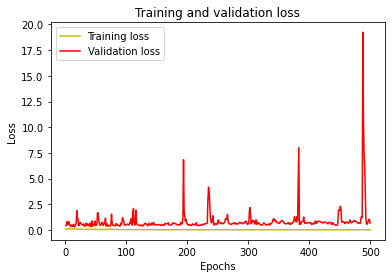

In [75]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

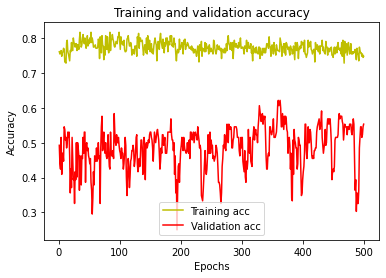

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
def test_accuracy_report(model):
    predicted = model.predict(X_test)
    test_predicted = np.argmax(predicted, axis=1)
    test_truth = np.argmax(y_test.values, axis=1)
    print(metrics.classification_report(test_truth, test_predicted, target_names=y_test.columns)) 
    test_res = model.evaluate(X_test, y_test.values, verbose=0)
    print('Loss function: %s, accuracy:' % test_res[0], test_res[1])
  test_accuracy_report(model)

In [ ]:
y_test

array([[1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
 

In [ ]:
predicted = model.predict(X_test)
y_pred=[]
for sample in  predicted:
  y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
y_pred = np.array(y_pred)
y_pred

5/5 [==============================] - 0s 14ms/step


array([[1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
 

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.4533333333333333

In [ ]:
print("Actual \n", y_test)
print("\nPredicted \n",y_pred)

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, y_pred)

array([[[ 86,  22],
        [ 20,  22]],

       [[111,   3],
        [  5,  31]],

       [[120,   6],
        [ 12,  12]],

       [[129,   7],
        [  3,  11]],

       [[ 86,  17],
        [ 15,  32]],

       [[ 97,   9],
        [ 18,  26]]])

In [ ]:
from sklearn.metrics import classification_report

label_names = ['열매없음',	'열매있음',	'윗쪽으로 뻗는','윗쪽으로 안 뻗는',	'잎을 무성하게 그린',	'잎을 안 무성하게 그린']

print(classification_report(y_test, y_pred,target_names=label_names))

              precision    recall  f1-score   support

        열매없음       0.50      0.52      0.51        42
        열매있음       0.91      0.86      0.89        36
     윗쪽으로 뻗는       0.67      0.50      0.57        24
   윗쪽으로 안 뻗는       0.61      0.79      0.69        14
  잎을 무성하게 그린       0.65      0.68      0.67        47
잎을 안 무성하게 그린       0.74      0.59      0.66        44

   micro avg       0.68      0.65      0.66       207
   macro avg       0.68      0.66      0.66       207
weighted avg       0.68      0.65      0.66       207
 samples avg       0.58      0.59      0.57       207



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
img = image.load_img('ddlj.jpg', target_size=(SIZE,SIZE,3))
img = image.img_to_array(img)
img = img/255.
plt.imshow(img)
img = np.expand_dims(img, axis=0)

classes = np.array(df.columns[2:]) #Get array of all classes
proba = model.predict(img)  #Get probabilities for each class
sorted_categories = np.argsort(proba[0])[:-11:-1]  #Get class names for top 10 categories

#Print classes and corresponding probabilities
for i in range(10):
    print("{}".format(classes[sorted_categories[i]])+" ({:.3})".format(proba[0][sorted_categories[i]]))

###################################################

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

################################################################

